In [78]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [79]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
print(X[0])
print(n_samples, n_features)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
1083 64


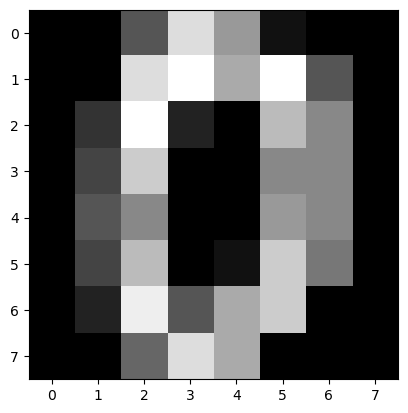

In [80]:
# reshape X[0] to a 2D array
img = np.reshape(X[0], (8, 8))

# plot the image
plt.imshow(img, cmap='gray')
plt.show()


In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=124)

# basic_classifier = svm.SVC(gamma=0.001)
basic_classifier = KNeighborsClassifier(n_neighbors=3)
basic_classifier.fit(x_train, y_train)
predicted = basic_classifier.predict(x_test)

# print("Classification report for classifier %s:\n%s\n")
# print(classification_report(y_test, predicted))

print("Accuracy score: ", accuracy_score(y_test, predicted))

Accuracy score:  0.996309963099631


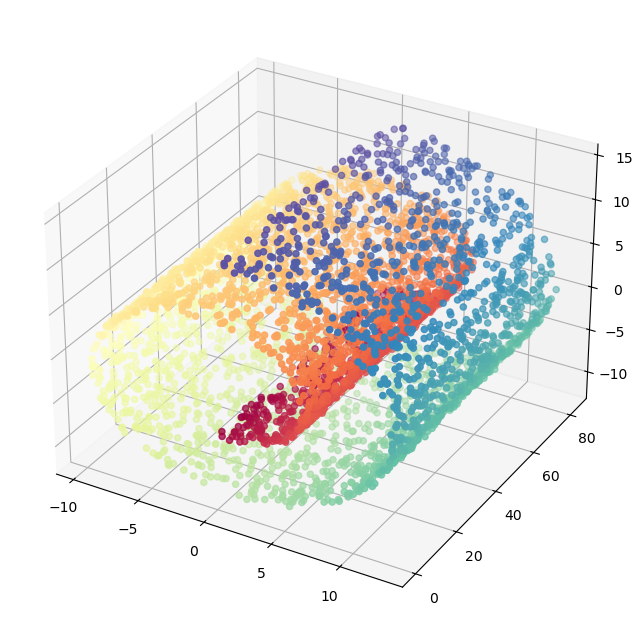

In [82]:
def make_swiss_roll(n_samples=100, noise=0.0, random_state=None):
    #Generate a swiss roll dataset.
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
    x = t * np.cos(t)
    y = 83 * np.random.rand(1, n_samples)
    z = t * np.sin(t)
    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)
    return X, t

X_swiss, Y_swiss = make_swiss_roll(n_samples = 5000, noise=0.1, random_state=42)

plt.figure(figsize=(8, 8))
ax = plt.subplot(projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=Y_swiss, cmap=plt.cm.Spectral)
plt.show()

In [67]:
from myAlg.myPCA import myPCA, myKernelPCA
from myAlg.myISOMAP import isomap
# from myAlg.myMDS import myMDS, mypairwise_distances
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
import umap

from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import silhouette_score
import time


digits = load_digits(n_class=6)
X, y = digits.data, digits.target

dim = 2

# pca = myPCA()
# kernel_pca = myKernelPCA(kernel='poly', sigma=1.3)
# x_reduced = kernel_pca.fit_transform(X, dim)

lle = LocallyLinearEmbedding(n_components=dim, n_jobs=-1, n_neighbors=12)
x_train_transformed_lle = lle.fit_transform(X)


x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.3, random_state=124)


basic_classifier = KNeighborsClassifier(n_neighbors=3)
basic_classifier.fit(x_train, y_train)
start = time.time()
predicted = basic_classifier.predict(x_test)
end = time.time()
# print("Time for", list_of_names[i], ": ", round(end - start, 4))
print("Accuracy ", round(accuracy_score(y_test, predicted), 3))
print("silhouette_score: ", silhouette_score(x_train, y_train))


Accuracy  0.889
silhouette_score:  0.29880098596231436


Time for NPE :  0.021\
Time for PCA :  0.018\
Time for Kernel PCA :  0.018\
Time for MDS :  0.02\
Time for Isomap :  0.014\
Time for LLE :  0.016\
Time for t-SNE :  0.014\
<!-- Time for Spectral Embedding :  0.014\ -->

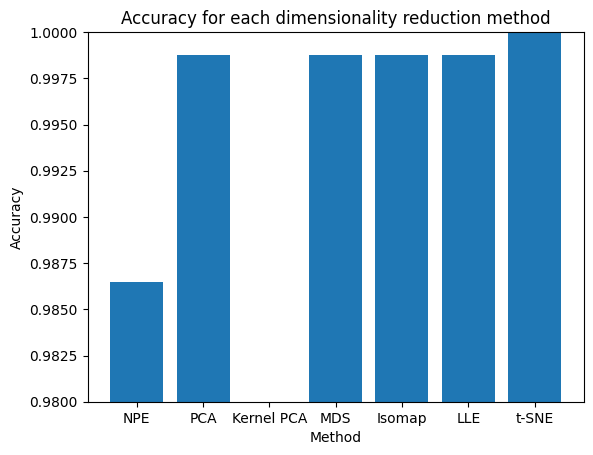

In [ ]:
plt.bar(list_of_names, acc)
plt.title("Accuracy for each dimensionality reduction method")
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.ylim(0.98, 1.00)
plt.show()


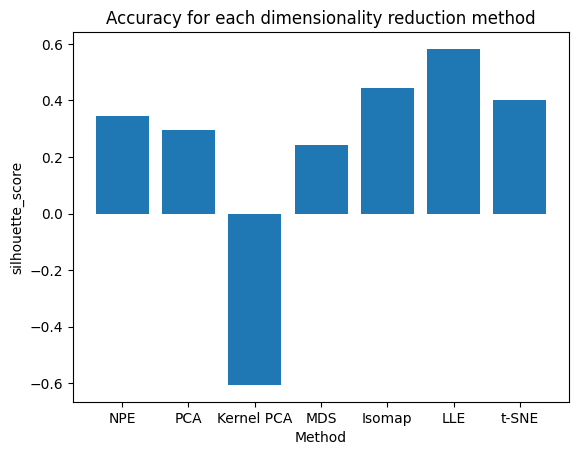

In [ ]:
plt.bar(list_of_names, sil)
plt.title("Silhouette score for each dimensionality reduction method")
plt.xlabel("Method")
plt.ylabel("silhouette_score")
plt.show()

In [ ]:
basic_classifier = KNeighborsClassifier(n_neighbors=3)

list_of_transformations = [x_train_transformed, x_train_transformed_pca, x_train_transformed_kernel_pca, x_train_transformed_mds, x_train_transformed_isomap, x_train_transformed_lle, x_train_transformed_tsne, x_train_transformed_spectral_embedding]
list_of_names = ["NPE", "PCA", "Kernel PCA", "MDS", "Isomap", "LLE", "t-SNE", "Spectral Embedding"]

i=0
for x_trans in list_of_transformations:
    basic_classifier = KNeighborsClassifier(n_neighbors=3)
    basic_classifier.fit(x_trans, y_train)
    predicted = basic_classifier.predict(x_trans)
    print("Accuracy score for", list_of_names[i], ": ", round(accuracy_score(y_train, predicted), 3))
    i+=1

Accuracy score for NPE :  0.986
Accuracy score for PCA :  0.89
Accuracy score for Kernel PCA :  0.59
Accuracy score for MDS :  0.93
Accuracy score for Isomap :  0.993
Accuracy score for LLE :  0.984
Accuracy score for t-SNE :  1.0
Accuracy score for Spectral Embedding :  0.956


In [21]:
# TEST WITH Y_TEST, IF IT DOES A GOOD WORK IN GENERALIZING THE DATA


# basic_classifier = svm.SVC(gamma=0.001)
basic_classifier = KNeighborsClassifier(n_neighbors=3)
basic_classifier.fit(x_train_transformed, y_train)
predicted = basic_classifier.predict(x_test_transformed)

# print("Classification report for classifier %s:\n%s\n")
# print(classification_report(y_test, predicted))

print("Accuracy score: ", accuracy_score(y_test, predicted))

Accuracy score:  0.9852216748768473


## Step 4: Visualizing the results

/home/thomas/anaconda3/envs/unsup/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


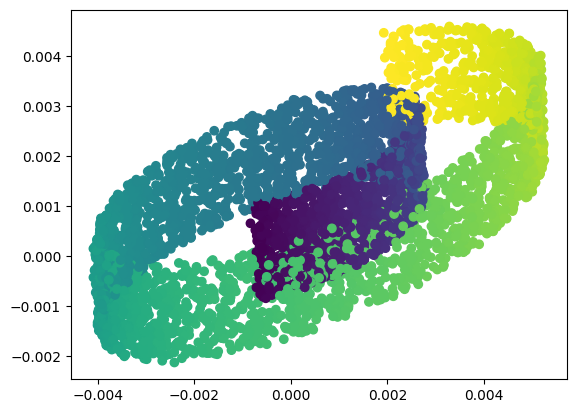

In [36]:


plt.scatter(x_train_transformed[:, 0], x_train_transformed[:, 1], c=y)
plt.show()


In [48]:
list_of_transformations[5] = X_lle

/home/thomas/anaconda3/envs/unsup/lib/python3.10/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


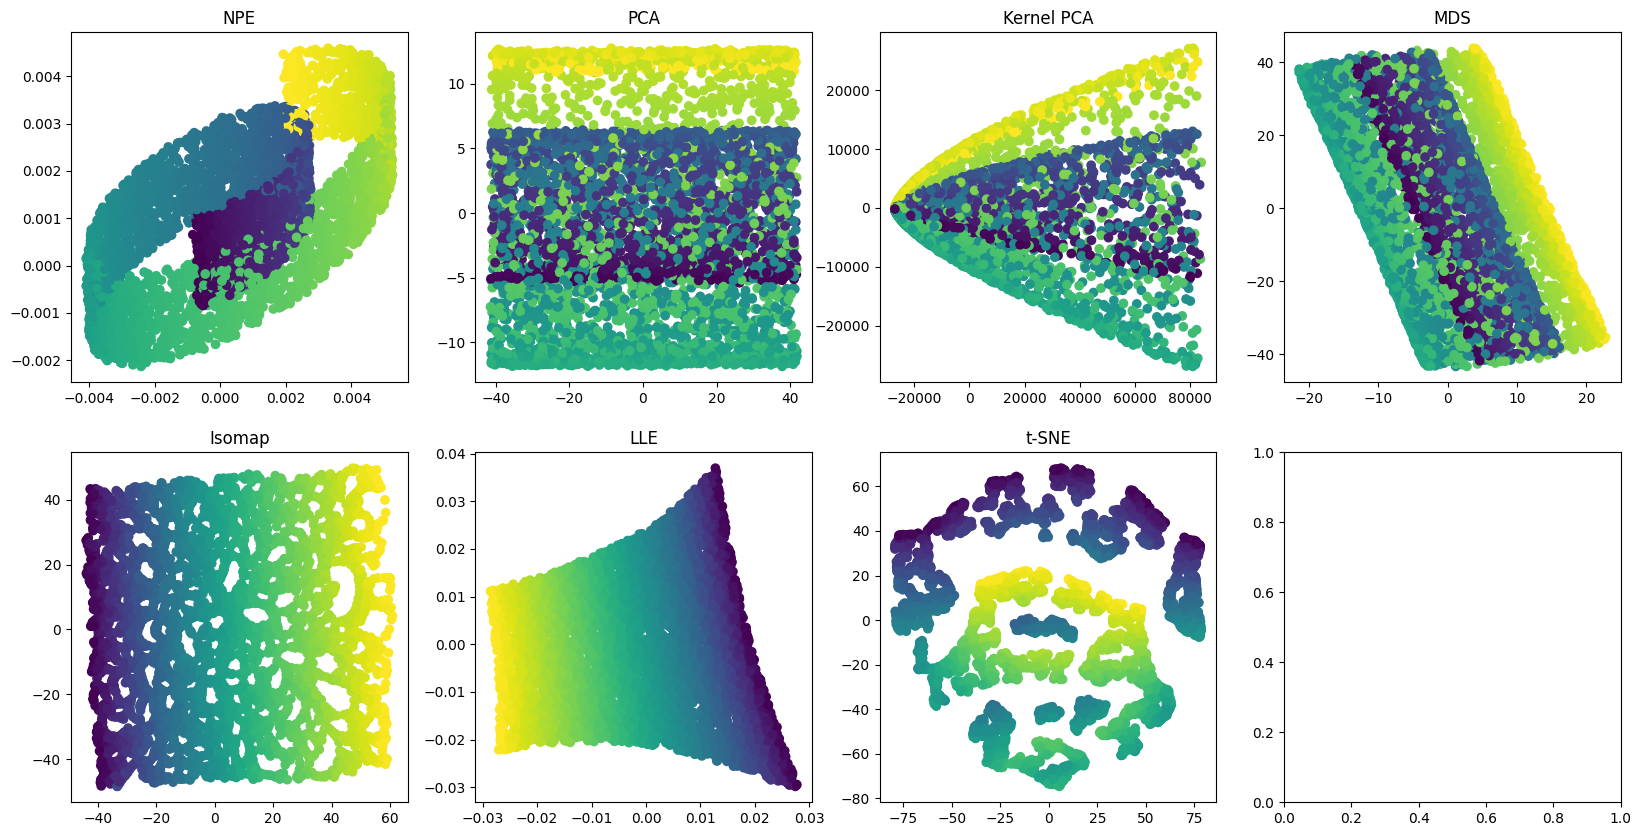

In [49]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()

for i, (transformation, name) in enumerate(zip(list_of_transformations, list_of_names)):
    axs[i].scatter(transformation[:, 0], transformation[:, 1], c=y)
    axs[i].set_title(name)

plt.show()


In [86]:
## LLE algorithm

from sklearn.neighbors import NearestNeighbors

# Create a NearestNeighbors model
k = 12 # You can change this value to the number of neighbors you want
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto', n_jobs=-1).fit(X)
k = k - 1 #This becase the first neighbor is the point itself

# Query for nearest neighbors
Q_distances = []
Q_indices = []
for i in range(len(X)):
    distance, index = nbrs.kneighbors([X[i]])
    # print("distance: ", distance[0])
    # print("index: ", index[0])
    Q_distances.append(distance[0][1:])
    Q_indices.append(index[0][1:])






tol = 1e-5



n = len(X)
# W = np.zeros((n, n))
W = []
k_1 = np.ones((k))
I = np.ones((k, 1))

for i in range(n):
    xi = X[i]
    C = []
    for j in range(k):
        xj = X[Q_indices[i][j]]
        C_aux = []
        for m in range(k):
            xm = X[Q_indices[i][m]]
            C_jk =(xi - xj).T @ (xi - xm)
            C_aux.append(C_jk)
        C.append(C_aux)
    C = np.array(C)
    # print(C.shape)
    C = C + tol * np.eye(*C.shape) # Regularization for C
    w = np.linalg.inv(C) @ k_1
    w = w / (k_1.T @ np.linalg.inv(C) @ k_1)

    # Create an 1 x n array that will contain a 0 if xj is not a 
    # neighbour of xi, otherwise it will cointain the weight of x_j
    w_real = np.zeros((1, n))
    np.put(w_real, Q_indices[i], w)
    W.append(list(w_real[0]))

W = np.array(W)
print(W.shape)




(1083, 1083)


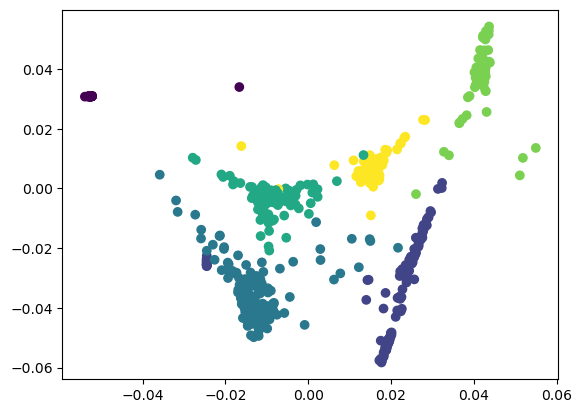

In [87]:


d = 2

I = np.eye(n)
M = (I - W).T @ (I - W)

eigvalues, eigvectors = np.linalg.eig(M)

index_ = np.argsort(np.abs(eigvalues))[1:d+1]
lle_data = eigvectors[:, index_]

plt.scatter(lle_data[:, 0], lle_data[:, 1], c=y)
plt.show()

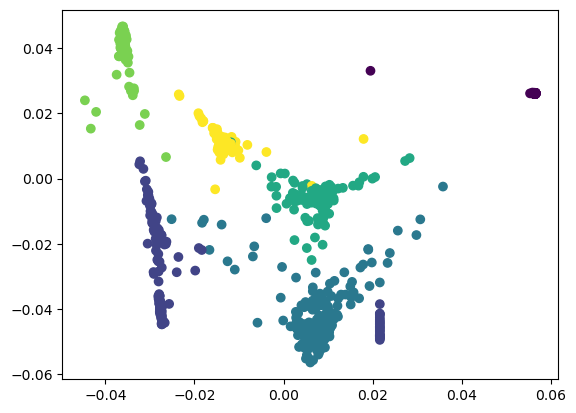

In [88]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=k)
lle_data = lle.fit_transform(X)


plt.scatter(lle_data[:, 0], lle_data[:, 1], c=y)
plt.show()


Text(0.5, 1.0, 'UMAP')

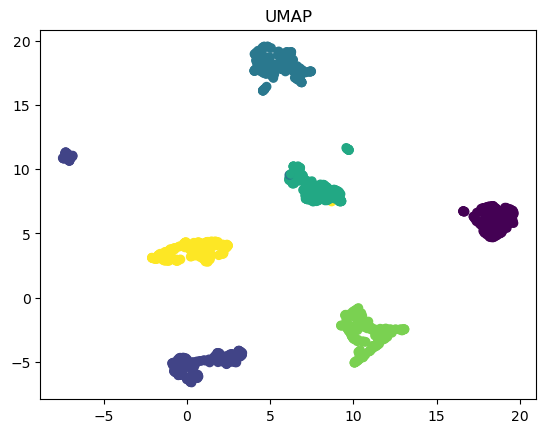

In [95]:
# test umap
import umap
umap_emb = umap.UMAP(n_components=2, n_neighbors=6)
x_umap = umap_emb.fit_transform(X)

plt.scatter(x_umap[:, 0], x_umap[:, 1], c=y)
plt.title("UMAP")